<a href="https://colab.research.google.com/github/bramyeon/af2-gamma-eval/blob/main/colab/analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSLAB Synthetic Protein Structure Evaluation System v0.3.3: <b>Analysis and Visualization</b>

Developed by [Bryan Nathanael Wijaya](mailto:bramyeon@gmail.com) and [Luiz Felipe Vecchietti](lfelipesv@gmail.com)  
Contact us for inquiries or bug reports 🙌

```
python main.py [-h] [--input_dir INPUT_DIR] [--output_dir OUTPUT_DIR] [--contigs CONTIGS] [--ddg_pre] [--mpnn] [--af]
               [--ddg_fin] [--ddg_reference DDG_REFERENCE] [--ddg_quiet] [--ddg_filter_pre] [--ddg_filter_fin]
               [--ddg_max_pre DDG_MAX_PRE] [--ddg_max_fin DDG_MAX_FIN] [--mpnn_mode MPNN_MODE] [--mpnn_num MPNN_NUM]
               [--mpnn_temp MPNN_TEMP] [--mpnn_fr] [--af_init] [--af_multimer] [--af_custemp] [--af_recycle AF_RECYCLE]
               [--af_tolerance AF_TOLERANCE] [--af_seed AF_SEED] [--af_quiet] [--af_filter] [--af_model AF_MODEL]
               [--af_plddt AF_PLDDT] [--af_pae AF_PAE] [--af_ipae AF_IPAE] [--af_no_plddt] [--af_no_pae] [--af_no_ipae]
               [--af_all] [--af_best_avg] [--af_sep_csv] [--af_keep_all]
```

## Preliminaries

In [1]:
#@title Environment setup
import os, random, string

os.system("pip install biopython py3Dmol")
os.system("pip -q install git+https://github.com/sokrypton/ColabDesign.git@gamma")
os.system("ln -s /usr/local/lib/python3.*/dist-packages/colabdesign colabdesign")
os.system("wget https://raw.githubusercontent.com/sokrypton/ColabFold/main/colabfold/colabfold.py -O colabfold_utils.py")

def token(length):
    characters = string.ascii_letters + string.digits
    return ''.join(random.choice(characters) for _ in range(length))

In [2]:
#@title Upload the zip files of input and output directories
#@markdown <b>How to</b>: Zip the folder containing the input PDBs and upload the zip file to the upper menu.<br>Separately zip the folder containing the output files and upload the zip file to the lower menu.

from google.colab import files
import pandas as pd
import py3Dmol, subprocess
import matplotlib.pyplot as plt

print("Upload your zipped input folder")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
subprocess.run(f"unzip /content/{filename}", shell=True)
input_dir = filename.replace(".zip", "")

print("\nUpload your zipped output folder")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
subprocess.run(f"unzip /content/{filename}", shell=True)
output_dir = filename.replace(".zip", "")

print(f"\n Input directory: {input_dir}")
print(f"Output directory: {output_dir}")

analysis_dir = f"analysis_{token(4)}"
os.makedirs(analysis_dir)

Upload your zipped input folder


Saving top_50_data.zip to top_50_data.zip

Upload your zipped output folder


Saving 20240318113253.zip to 20240318113253.zip

 Input directory: top_50_data
Output directory: 20240318113253


## CSV Result Analysis

In [3]:
#@title Show CSV

analyze = "ddG of final structures" #@param ["ddG of preliminary structures", "ddG of preliminary structures - FILTERED", "Biopython-extracted sequences", "ProteinMPNN/MPNN-FR-designed sequences", "AF2 with one model", "AF2 with one model - FILTERED", "AF2 with five models", "AF2 with five models - MODEL 1", "AF2 with five models - MODEL 2", "AF2 with five models - MODEL 3", "AF2 with five models - MODEL 4", "AF2 with five models - MODEL 5", "AF2 with five models - BEST", "AF2 with five models - AVERAGE", "ddG of final structures", "ddG of final structures - FILTERED"]
head = 20 #@param {type:"number"}

with open(os.path.join(output_dir, "args.txt"), 'r') as file:
    for line in file:
        if 'af_model' in line:
            af_model = line.split("=")[-1]
            break

csv_dir = os.path.join(output_dir, "csv")
csv_file = {"ddG of preliminary structures": "pyrosetta1.csv",
            "ddG of preliminary structures - FILTERED": "pyrosetta1_filtered.csv",
            "Biopython-extracted sequences": "sequence.csv",
            "ProteinMPNN/MPNN-FR-designed sequences": "mpnn.csv",
            "AF2 with one model": f"af2model{af_model}.csv",
            "AF2 with one model - FILTERED": f"af2model{af_model}_filtered.csv",
            "AF2 with five models": "af2all.csv",
            "AF2 with five models - MODEL 1": "af2all_model1.csv",
            "AF2 with five models - MODEL 2": "af2all_model2.csv",
            "AF2 with five models - MODEL 3": "af2all_model3.csv",
            "AF2 with five models - MODEL 4": "af2all_model4.csv",
            "AF2 with five models - MODEL 5": "af2all_model5.csv",
            "AF2 with five models - BEST": "af2all_best.csv",
            "AF2 with five models - AVERAGE": "af2all_average.csv",
            "ddG of final structures": "pyrosetta2.csv",
            "ddG of final structures - FILTERED": "pyrosetta2_filtered.csv"}

csv_path = os.path.join(csv_dir, csv_file[analyze])
df = pd.read_csv(csv_path)

print(f"Viewing: {csv_path}")
df.head(head)

Viewing: 20240318113253/csv/pyrosetta2.csv


,name,ddg_pre,sequence,af_seed,af_model,af_recycle,plddt,ptm,i_ptm,pae,i_pae,multi,rmsd_tol,ddg_fin
0,3661_rosetta.pdb,638.455323,QVQLQQPGAELVRPGASVKLSCKASGYSFTSYWMNWVKQRPGQGLE...,0,model_1_multimer_v3,4,0.897,0.560,0.415,4.41325,22.22500,0.444,3.682,3324.917586
1,3661_rosetta.pdb,638.455323,QVQLQQPGAELVRPGASVKLSCKASGYSFTSYWMNWVKQRPGQGLE...,0,model_2_multimer_v3,1,0.957,0.893,0.884,3.74650,6.00075,0.886,0.349,898.801706
2,3661_rosetta.pdb,638.455323,QVQLQQPGAELVRPGASVKLSCKASGYSFTSYWMNWVKQRPGQGLE...,0,model_3_multimer_v3,1,0.881,0.560,0.419,4.60375,21.68525,0.447,3.427,7821.435627
3,3661_rosetta.pdb,638.455323,QVQLQQPGAELVRPGASVKLSCKASGYSFTSYWMNWVKQRPGQGLE...,0,model_4_multimer_v3,2,0.891,0.588,0.450,4.63550,20.38350,0.477,6.707,5801.933471
4,3661_rosetta.pdb,638.455323,QVQLQQPGAELVRPGASVKLSCKASGYSFTSYWMNWVKQRPGQGLE...,0,model_5_multimer_v3,0,0.945,0.872,0.855,4.12750,6.63575,0.858,NaN,773.962587
5,2119_rosetta.pdb,366.362638,QVQLQQPGAELVRPGASVKLSCKASGYSFTSYWMNWVKQRPGQGLE...,0,model_1_multimer_v3,2,0.915,0.727,0.634,4.31800,12.54125,0.653,21.983,2786.006363
6,2119_rosetta.pdb,366.362638,QVQLQQPGAELVRPGASVKLSCKASGYSFTSYWMNWVKQRPGQGLE...,0,model_2_multimer_v3,1,0.958,0.888,0.880,3.81000,6.06425,0.882,0.395,35.049062
7,2119_rosetta.pdb,366.362638,QVQLQQPGAELVRPGASVKLSCKASGYSFTSYWMNWVKQRPGQGLE...,0,model_3_multimer_v3,1,0.883,0.561,0.422,4.79425,21.71700,0.450,6.810,4827.449026
8,2119_rosetta.pdb,366.362638,QVQLQQPGAELVRPGASVKLSCKASGYSFTSYWMNWVKQRPGQGLE...,0,model_4_multimer_v3,4,0.890,0.565,0.424,4.76250,21.78050,0.452,1.606,4675.962625
9,2119_rosetta.pdb,366.362638,QVQLQQPGAELVRPGASVKLSCKASGYSFTSYWMNWVKQRPGQGLE...,0,model_5_multimer_v3,1,0.951,0.875,0.860,4.03225,6.50875,0.863,0.683,-160.562306


In [5]:
#@title Filter CSV

csv_save_name = "filtered.csv" #@param {type:"string"}
foo = token(4)
txt_save_name = f"{csv_save_name.replace('.csv','')}_{foo}_log.txt"
csv_save_name = f"{csv_save_name.replace('.csv','')}_{foo}.csv"
str_cols = ['name', 'sequence', 'af_model']
int_cols = ['af_seed', 'af_recycle']
filters = []

def list_filter(column, operation, value):
    if column in int_cols:
        value = int(value.strip())
        assert operation != 'contains', "Improper operation for column of type int"
    elif column in str_cols:
        assert operation in ['equal to (==)', 'not equal to (!=)', 'contains'], "Improper operation for column of type string."
    else:
        value = float(value.strip())
        assert operation != 'contains', "Improper operation for column of type float"
    filters.append((column, operation, value))

#@markdown <br><h2>FILTER #1 SETTINGS</h2>
activate_filter1 = True #@param {type:"boolean"}
if activate_filter1:
    column1 = "plddt" #@param ['name','ddg_pre (f.k.a. ddg)','sequence','af_seed','af_model','af_recycle','plddt','ptm','i_ptm','pae','i_pae','multi','rmsd_tol','ddg_fin (f.k.a. ddg_final)']
    operation1 = "greater than or equal to (>=)" #@param ['equal to (==)', 'not equal to (!=)', 'less than (<)', 'less than or equal to (<=)', 'greater than (>)', 'greater than or equal to (>=)','contains']
    value1 = "0.9" #@param {type:"string"}
    list_filter(column1, operation1, value1)

#@markdown <br><h2>FILTER #2 SETTINGS</h2>
activate_filter2 = True #@param {type:"boolean"}
if activate_filter2:
    column2 = "af_model" #@param ['name','ddg_pre (f.k.a. ddg)','sequence','af_seed','af_model','af_recycle','plddt','ptm','i_ptm','pae','i_pae','multi','rmsd_tol','ddg_fin (f.k.a. ddg_final)']
    operation2 = "contains" #@param ['equal to (==)', 'not equal to (!=)', 'less than (<)', 'less than or equal to (<=)', 'greater than (>)', 'greater than or equal to (>=)','contains']
    value2 = "2_multimer" #@param {type:"string"}
    list_filter(column2, operation2, value2)

#@markdown <br><h2>FILTER #3 SETTINGS</h2>
activate_filter3 = True #@param {type:"boolean"}
if activate_filter3:
    column3 = "ddg_pre (f.k.a. ddg)" #@param ['name','ddg_pre (f.k.a. ddg)','sequence','af_seed','af_model','af_recycle','plddt','ptm','i_ptm','pae','i_pae','multi','rmsd_tol','ddg_fin (f.k.a. ddg_final)']
    operation3 = "less than or equal to (\u003C=)" #@param ['equal to (==)', 'not equal to (!=)', 'less than (<)', 'less than or equal to (<=)', 'greater than (>)', 'greater than or equal to (>=)','contains']
    value3 = "300" #@param {type:"string"}
    list_filter(column3, operation3, value3)

#@markdown <br><h2>FILTER #4 SETTINGS</h2>
activate_filter4 = False #@param {type:"boolean"}
if activate_filter4:
    column4 = "name" #@param ['name','ddg_pre (f.k.a. ddg)','sequence','af_seed','af_model','af_recycle','plddt','ptm','i_ptm','pae','i_pae','multi','rmsd_tol','ddg_fin (f.k.a. ddg_final)']
    operation4 = "equal to (==)" #@param ['equal to (==)', 'not equal to (!=)', 'less than (<)', 'less than or equal to (<=)', 'greater than (>)', 'greater than or equal to (>=)','contains']
    value4 = "" #@param {type:"string"}
    list_filter(column4, operation4, value4)

#@markdown <br><h2>FILTER #5 SETTINGS</h2>
activate_filter5 = False #@param {type:"boolean"}
if activate_filter5:
    column5 = "name" #@param ['name','ddg_pre (f.k.a. ddg)','sequence','af_seed','af_model','af_recycle','plddt','ptm','i_ptm','pae','i_pae','multi','rmsd_tol','ddg_fin (f.k.a. ddg_final)']
    operation5 = "equal to (==)" #@param ['equal to (==)', 'not equal to (!=)', 'less than (<)', 'less than or equal to (<=)', 'greater than (>)', 'greater than or equal to (>=)','contains']
    value5 = "" #@param {type:"string"}
    list_filter(column5, operation5, value5)

#@markdown <br><b>Remarks</b>: You can add more filters!

txt_path = os.path.join(analysis_dir, txt_save_name)
with open(txt_path, 'w') as file:
    i = 1
    for column, operation, value in filters:
        file.write(f"Filter {i}: {column} {operation} {value}\n")
        i += 1

df_ = df.copy()

def filter(df_, column, operation, value):
    if operation == 'equal to (==)':
        df_ = df_[df_[column] == value]
    elif operation == 'not equal to (!=)':
        df_ = df_[df_[column] != value]
    elif operation == 'less than (<)':
        df_ = df_[df_[column] < value]
    elif operation == 'less than or equal to (<=)':
        df_ = df_[df_[column] <= value]
    elif operation == 'greater than (>)':
        df_ = df_[df_[column] > value]
    elif operation == 'greater than or equal to (>=)':
        df_ = df_[df_[column] >= value]
    elif operation == 'contains':
        df_ = df_[df_[column].str.contains(value, case=False, na=False)]
    return df_

i = 1
for column, operation, value in filters:
    print(f"Filter {i}: {column} {operation} {value}")
    i += 1
    if column not in ['ddg_pre (f.k.a. ddg)', 'ddg_fin (f.k.a. ddg_final)']:
        df_ = filter(df_, column, operation, value)
    elif column == 'ddg_pre (f.k.a. ddg)':
        try:
            df_ = filter(df_, 'ddg_pre', operation, value)
        except:
            df_ = filter(df_, 'ddg', operation, value)
    elif column == 'ddg_fin (f.k.a. ddg_final)':
        try:
            df_ = filter(df_, 'ddg_fin', operation, value)
        except:
            df_ = filter(df_, 'ddg_final', operation, value)
    else:
        raise NotImplementedError

csv_path = os.path.join(analysis_dir, csv_save_name)
df_.to_csv(csv_path, index=False)
print(f"\nFiltered CSV saved successfully at: {csv_path}\n")

df_.head(head)

Filter 1: plddt greater than or equal to (>=) 0.9
Filter 2: af_model contains 2_multimer
Filter 3: ddg_pre (f.k.a. ddg) less than or equal to (<=) 300.0

Filtered CSV saved successfully at: analysis_PS7L/filtered_Rr0W.csv



,name,ddg_pre,sequence,af_seed,af_model,af_recycle,plddt,ptm,i_ptm,pae,i_pae,multi,rmsd_tol,ddg_fin
41,2436_rosetta.pdb,161.628438,QVQLQQPGAELVRPGASVKLSCKASGYSFTSYWMNWVKQRPGQGLE...,0,model_2_multimer_v3,1,0.957,0.893,0.887,3.81000,6.00075,0.888,0.532,1743.576417
76,2165_rosetta.pdb,217.965679,QVQLQQPGAELVRPGASVKLSCKASGYSFTSYWMNWVKQRPGQGLE...,0,model_2_multimer_v3,1,0.959,0.890,0.883,3.81000,5.96900,0.884,0.449,-206.978062
106,2711_rosetta.pdb,149.759672,QVQLQQPGAELVRPGASVKLSCKASGYSFTSYWMNWVKQRPGQGLE...,0,model_2_multimer_v3,1,0.953,0.886,0.874,3.87350,6.25475,0.876,0.467,1279.249441
131,1840_rosetta.pdb,249.577087,QVQLQQPGAELVRPGASVKLSCKASGYSFTSYWMNWVKQRPGQGLE...,0,model_2_multimer_v3,1,0.961,0.897,0.896,3.74650,5.74675,0.896,0.551,19.653365
151,2020_rosetta.pdb,286.070268,QVQLQQPGAELVRPGASVKLSCKASGYSFTSYWMNWVKQRPGQGLE...,0,model_2_multimer_v3,0,0.958,0.893,0.889,3.81000,5.87375,0.889,NaN,759.699420
166,4706_rosetta.pdb,244.629651,QVQLQQPGAELVRPGASVKLSCKASGYSFTSYWMNWVKQRPGQGLE...,0,model_2_multimer_v3,1,0.957,0.888,0.882,3.81000,6.06425,0.883,0.440,-110.384672
171,3583_rosetta.pdb,214.330939,QVQLQQPGAELVRPGASVKLSCKASGYSFTSYWMNWVKQRPGQGLE...,0,model_2_multimer_v3,0,0.957,0.891,0.883,3.84175,6.00075,0.885,NaN,-135.604881
181,1108_rosetta.pdb,218.576211,QVQLQQPGAELVRPGASVKLSCKASGYSFTSYWMNWVKQRPGQGLE...,0,model_2_multimer_v3,1,0.957,0.889,0.876,3.81000,6.06425,0.878,0.490,688.137453
196,3522_rosetta.pdb,184.537089,QVQLQQPGAELVRPGASVKLSCKASGYSFTSYWMNWVKQRPGQGLE...,0,model_2_multimer_v3,1,0.960,0.892,0.891,3.81000,5.90550,0.891,0.478,-163.142742
201,4609_rosetta.pdb,157.538515,QVQLQQPGAELVRPGASVKLSCKASGYSFTSYWMNWVKQRPGQGLE...,0,model_2_multimer_v3,1,0.957,0.895,0.892,3.77825,5.93725,0.893,0.465,504.313475


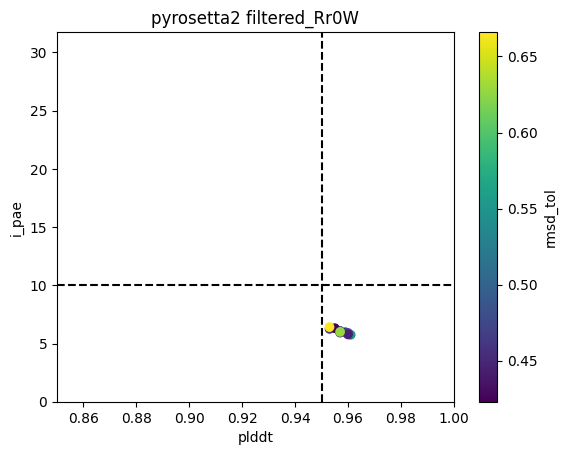

In [10]:
#@title Graph Plotting

plot_save_name = 'trial.png' #@param {type:"string"}
coverage = "filtered" #@param ['all','filtered']
x_axis = 'plddt' #@param ['ddg_pre (f.k.a. ddg)','af_seed','af_model','af_recycle','plddt','ptm','i_ptm','pae','i_pae','multi','rmsd_tol','ddg_fin (f.k.a. ddg_final)']
y_axis = 'i_pae' #@param ['ddg_pre (f.k.a. ddg)','af_seed','af_model','af_recycle','plddt','ptm','i_ptm','pae','i_pae','multi','rmsd_tol','ddg_fin (f.k.a. ddg_final)']
color = 'rmsd_tol' #@param ['none', 'ddg_pre (f.k.a. ddg)','af_seed','af_model','af_recycle','plddt','ptm','i_ptm','pae','i_pae','multi','rmsd_tol','ddg_fin (f.k.a. ddg_final)']

plot_save_name = f"{plot_save_name.replace('.png','')}_{token(4)}.png"

if coverage == 'all':
    plot = df
elif coverage == 'filtered':
    plot = df_

if color == 'none':
    plt.scatter(plot[x_axis], plot[y_axis])
else:
    plt.scatter(plot[x_axis], plot[y_axis], c=plot[color], cmap='viridis')
    plt.colorbar(label=color)

if coverage == 'all':
    plt.title(csv_file[analyze].split('.')[0])
elif coverage == 'filtered':
    plt.title(f"{csv_file[analyze].replace('.csv', '')} {csv_save_name.replace('.csv', '')}")

plt.xlabel(x_axis)
plt.ylabel(y_axis)

if x_axis == 'plddt':
    plt.xlim(0.85, 1.0)
    plt.axvline(x=0.95, color='black', linestyle='--')

if y_axis == 'i_pae':
    plt.ylim(0, 31.75)
    plt.axhline(y=10, color='black', linestyle='--')

plt.savefig(os.path.join(analysis_dir, plot_save_name))
plt.show()
plt.close()

In [12]:
#@title Download Analysis Results

!zip -r {analysis_dir}.zip {analysis_dir}
files.download(f"{analysis_dir}.zip")

updating: analysis_PS7L/ (stored 0%)
updating: analysis_PS7L/filtered_LAiW.csv (deflated 24%)
updating: analysis_PS7L/filtered_LAiW_log.txt (deflated 25%)
updating: analysis_PS7L/trial_esNM.png (deflated 13%)
  adding: analysis_PS7L/.ipynb_checkpoints/ (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## PDB Visualization

In [13]:
#@title Powered by py3Dmol and ColabDesign!

import warnings
from Bio.PDB import PDBParser
from colabdesign.shared.plot import pymol_color_list
from colabdesign.rf.utils import get_ca, get_Ls, make_animation
from string import ascii_uppercase,ascii_lowercase
alphabet_list = list(ascii_uppercase+ascii_lowercase)

version = "AF2 with five models - MODEL 5" #@param ["input", "AF2 with one model", "AF2 with five models - MODEL 1", "AF2 with five models - MODEL 2", "AF2 with five models - MODEL 3", "AF2 with five models - MODEL 4", "AF2 with five models - MODEL 5"]
name = "4806_rosetta" #@param {type:"string"}
name = f"{name.replace('.pdb','')}.pdb"
pdb_dir = {"input": input_dir,
           "AF2 with one model": os.path.join(output_dir, f"af2model{af_model}_pdb"),
           "AF2 with five models - MODEL 1": os.path.join(output_dir, f"af2all_pdb/model1"),
           "AF2 with five models - MODEL 2": os.path.join(output_dir, f"af2all_pdb/model2"),
           "AF2 with five models - MODEL 3": os.path.join(output_dir, f"af2all_pdb/model3"),
           "AF2 with five models - MODEL 4": os.path.join(output_dir, f"af2all_pdb/model4"),
           "AF2 with five models - MODEL 5": os.path.join(output_dir, f"af2all_pdb/model5")}

pdb_path = os.path.join(pdb_dir[version], name)

#@markdown How would you like to visualize your PDB structure?

animate = "none" #@param ["none", "interactive"]
show_as = "cartoon" #@param ["cartoon", "stick", "line", "sphere", "cross"]
color = "chain" #@param ["rainbow", "chain", "plddt"]
dpi = 100 #@param ["100", "200", "400"] {type:"raw"}

def count_chains():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        parser = PDBParser()
        structure = parser.get_structure('protein', pdb_path)

        chains = set()
        for model in structure:
            for chain in model:
                chains.add(chain.id)

        return len(chains)

def plot_pdb(num=0):
    hbondCutoff = 4.0
    view = py3Dmol.view(js='https://3dmol.org/build/3Dmol.js')
    if animate == "interactive":
        pdb_str = open(pdb_path,'r').read()
        view.addModelsAsFrames(pdb_str,'pdb',{'hbondCutoff':hbondCutoff})
    else:
        pdb = pdb_path
        pdb_str = open(pdb,'r').read()
        view.addModel(pdb_str,'pdb',{'hbondCutoff':hbondCutoff})
    if color == "rainbow":
        view.setStyle({show_as: {'color':'spectrum'}})
    elif color == "chain":
        for n,chain,c in zip(range(count_chains()), alphabet_list, pymol_color_list):
            view.setStyle({'chain':chain},{show_as: {'color':c}})
    else:
        view.setStyle({show_as: {'colorscheme': {'prop':'b','gradient': 'roygb','min':0.5,'max':0.9}}})

    view.zoomTo()
    if animate == "interactive":
        view.animate({'loop': 'backAndForth'})
    view.show()

print(f"Visualizing: {pdb_path}")
plot_pdb()

Visualizing: 20240318113253/af2all_pdb/model5/4806_rosetta.pdb


3Dmol.js failed to load for some reason. Please check your browser console for error messages.